# Impact of Covid19 on the Suicidal Rate

________________________________________________________________________________________________________

In [3]:
# Mute the warnings
#import shutup; shutup.please()

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
from pprint import pprint
import urllib
import json
from pandas import json_normalize
import scipy.stats as stats


#from api_keys import api_key

In [4]:
# Study data files
#gdp_usd_path = "world_country_gdp_usd.csv"
csv_path = "csv_file.csv"
master_path = "master.csv"
USA_Rate = "Suicide_rate_USA.csv"


In [5]:
# Read the data and the study results
#gdp_usd = pd.read_csv(gdp_usd_path)
csv_file = pd.read_csv(csv_path)
master = pd.read_csv(master_path)
USA_data = pd.read_csv(USA_Rate)

In [6]:
csv_file

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,1960,13.6,NaN
1,AUS,SUICIDE,TOT,100000PER,A,1961,15.0,NaN
2,AUS,SUICIDE,TOT,100000PER,A,1962,17.4,NaN
3,AUS,SUICIDE,TOT,100000PER,A,1963,19.8,NaN
4,AUS,SUICIDE,TOT,100000PER,A,1964,18.4,NaN
...,...,...,...,...,...,...,...,...
6748,ROU,SUICIDE,WOMEN,100000PER,A,2015,3.1,NaN
6749,ROU,SUICIDE,WOMEN,100000PER,A,2016,2.9,NaN
6750,ROU,SUICIDE,WOMEN,100000PER,A,2017,3.0,NaN
6751,ROU,SUICIDE,WOMEN,100000PER,A,2018,3.0,NaN


In [7]:
narrow_data = csv_file.loc[(csv_file["TIME"]<2021) & (csv_file["TIME"]>=2016)]
#narrow_data
narrow_1 = pd.DataFrame(narrow_data, columns=["LOCATION", "TIME", "INDICATOR", "Value", "SUBJECT"])
narrow_1


,LOCATION,TIME,INDICATOR,Value,SUBJECT
55,AUS,2016,SUICIDE,12.2,TOT
56,AUS,2017,SUICIDE,13.6,TOT
57,AUS,2018,SUICIDE,13.0,TOT
58,AUS,2019,SUICIDE,13.3,TOT
59,AUS,2020,SUICIDE,12.4,TOT
...,...,...,...,...,...
6721,ROU,2019,SUICIDE,8.6,TOT
6749,ROU,2016,SUICIDE,2.9,WOMEN
6750,ROU,2017,SUICIDE,3.0,WOMEN
6751,ROU,2018,SUICIDE,3.0,WOMEN


In [8]:
group_by_1 = narrow_1.groupby(["TIME"])["Value"].mean()
group_by_1

TIME
2016    11.030303
2017    11.102439
2018    10.888034
2019    11.244118
2020    12.415686
Name: Value, dtype: float64

In [9]:
group_by_df = pd.DataFrame(group_by_1)
group_by_df

,Value
TIME,
2016,11.030303
2017,11.102439
2018,10.888034
2019,11.244118
2020,12.415686


In [10]:
df2=group_by_df.reset_index()
df2

,TIME,Value
0,2016,11.030303
1,2017,11.102439
2,2018,10.888034
3,2019,11.244118
4,2020,12.415686


<AxesSubplot:title={'center':'Global Suicide Rate by Year (2016 to 2020)'}, xlabel='Year', ylabel='Suicide/100k of the Population'>

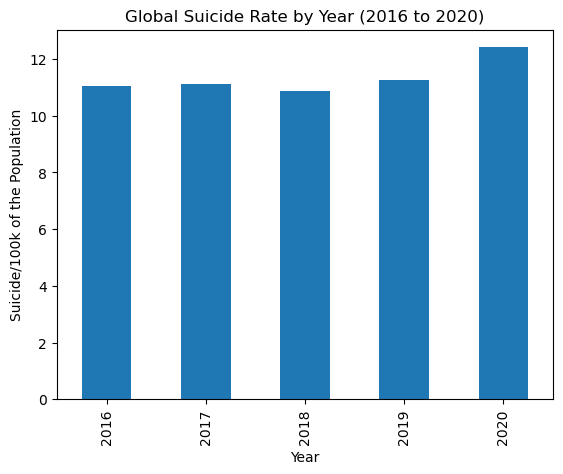

In [46]:

plot = group_by_1.plot(kind="bar", align = "center")
plt.xlabel("Year")
plt.ylabel("Suicide/100k of the Population")
plt.title("Global Suicide Rate by Year (2016 to 2020)")

plot

F_onewayResult(statistic=0.3595877465732043, pvalue=0.8373673134546857)

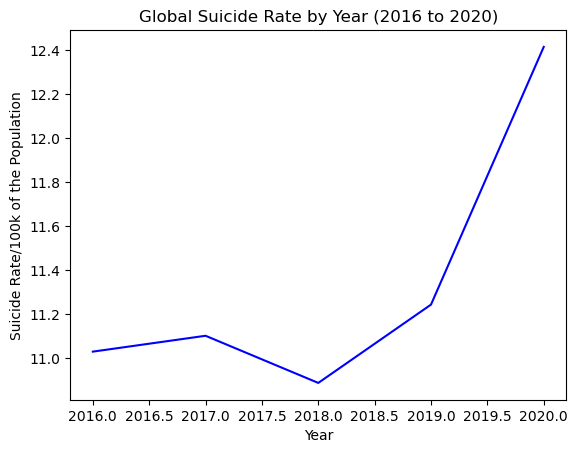

In [47]:


plt.plot(group_by_df, color = "b")
plt.xlabel("Year")
plt.ylabel("Suicide Rate/100k of the Population")
plt.title("Global Suicide Rate by Year (2016 to 2020)")

group0 = narrow_1[narrow_1["TIME"] == 2016]["Value"]
group1 = narrow_1[narrow_1["TIME"] == 2017]["Value"]
group2 = narrow_1[narrow_1["TIME"] == 2018]["Value"]
group3 = narrow_1[narrow_1["TIME"] == 2019]["Value"]
group4 = narrow_1[narrow_1["TIME"] == 2020]["Value"]
stats.f_oneway(group0, group1, group2, group3, group4)



In [15]:
master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796.0,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796.0,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796.0,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796.0,Boomers


In [16]:
narrow_data_2 = master.loc[(master["year"]<2022) & (master["year"]>=2017)]
narrow_data_3 = narrow_data_2.loc[(narrow_data_2["suicides/100k pop"]>0)]
narrow_data_3
narrow_data_4 = pd.DataFrame(narrow_data_3, columns=["country", "year", "age", "suicides/100k pop"])

#narrow_data_2.dropna()
narrow_data_4

,country,year,age,suicides/100k pop
27823,Australia,2020,5-14 years,0.058467
27824,Austria,2020,5-14 years,0.022429
27834,Costa Rica,2020,5-14 years,0.019519
27838,Czechia,2020,5-14 years,0.028043
27841,Ecuador,2020,5-14 years,0.250162
...,...,...,...,...
31751,Ukraine,2017,75+ years,0.571032
31752,United Kingdom,2017,75+ years,0.157435
31753,United States of America,2017,75+ years,0.154096
31754,Uruguay,2017,75+ years,0.409094


In [17]:
age_data = narrow_data_4.groupby(["age"])["suicides/100k pop"].mean()


In [18]:
age_data_df = pd.DataFrame(age_data)
age_data_df

,suicides/100k pop
age,
15-24 years,2.985494
25-34 years,5.307064
35-54 years,11.460384
5-14 years,0.261727
55-74 years,9.988835
75+ years,6.799660


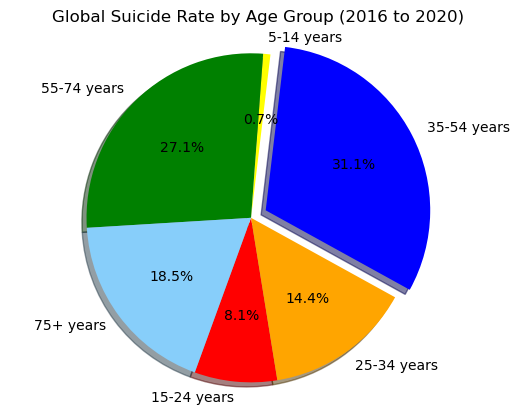

In [43]:
labels = ["15-24 years", "25-34 years", "35-54 years", "5-14 years", "55-74 years", "75+ years"]
explode = (0, 0, 0.1, 0, 0, 0)
sizes = [2.985494, 5.307064, 11.460384, 0.261727, 9.988835, 6.799660]
colors = ["red", "orange", "blue", "yellow", "green", "lightskyblue"]
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = "True", startangle = 250)
plt.title("Global Suicide Rate by Age Group (2016 to 2020)")
plt.axis("equal")
plt.show()

In [29]:
narrow_1_data = narrow_1.loc[narrow_1["TIME"]==2016]
narrow_1_1 = narrow_1_data.loc[narrow_1_data["SUBJECT"]!="TOT"]
narrow_2016 = narrow_1_1.groupby(["SUBJECT"])["Value"].mean()
narrow_2016

SUBJECT
MEN      17.700000
WOMEN     4.640909
Name: Value, dtype: float64

In [30]:
narrow_2_data = narrow_1.loc[narrow_1["TIME"]==2017]
narrow_2_1 = narrow_2_data.loc[narrow_2_data["SUBJECT"]!="TOT"]
narrow_2017 = narrow_2_1.groupby(["SUBJECT"])["Value"].mean()
narrow_2017

SUBJECT
MEN      17.709756
WOMEN     4.763415
Name: Value, dtype: float64

In [31]:
narrow_3_data = narrow_1.loc[narrow_1["TIME"]==2018]
narrow_3_1 = narrow_3_data.loc[narrow_3_data["SUBJECT"]!="TOT"]
narrow_2018 = narrow_3_1.groupby(["SUBJECT"])["Value"].mean()
narrow_2018

SUBJECT
MEN      17.366667
WOMEN     4.674359
Name: Value, dtype: float64

In [32]:
narrow_4_data = narrow_1.loc[narrow_1["TIME"]==2019]
narrow_4_1 = narrow_4_data.loc[narrow_4_data["SUBJECT"]!="TOT"]
narrow_2019 = narrow_4_1.groupby(["SUBJECT"])["Value"].mean()
narrow_2019

SUBJECT
MEN      18.111765
WOMEN     4.658824
Name: Value, dtype: float64

In [33]:
narrow_5_data = narrow_1.loc[narrow_1["TIME"]==2020]
narrow_5_1 = narrow_5_data.loc[narrow_5_data["SUBJECT"]!="TOT"]
narrow_2020 = narrow_5_1.groupby(["SUBJECT"])["Value"].mean()
narrow_2020

SUBJECT
MEN      19.682353
WOMEN     5.464706
Name: Value, dtype: float64

In [34]:
summary_df = pd.DataFrame({"data_2020": narrow_2020, "data_2019": narrow_2019, "data_2018": narrow_2018, "data_2017": narrow_2017, "data_2016": narrow_2016})


summary_df

,data_2020,data_2019,data_2018,data_2017,data_2016
SUBJECT,,,,,
MEN,19.682353,18.111765,17.366667,17.709756,17.700000
WOMEN,5.464706,4.658824,4.674359,4.763415,4.640909


In [35]:
dataset = pd.DataFrame({'MEN': [19.682353, 18.111765, 17.366667, 17.709756, 17.700000], 'WOMEN': [5.464706, 4.658824, 4.674359, 4.763415, 4.640909]})
dataset
mean_men = dataset["MEN"].mean()
mean_women = dataset["WOMEN"].mean()


Text(0, 0.5, 'Suicide Rate/100k of the Population')

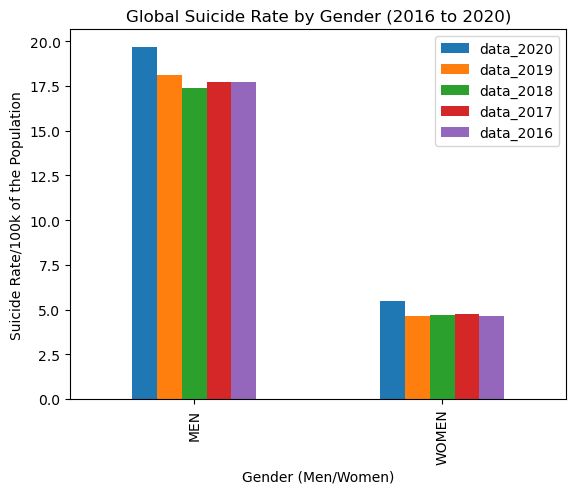

In [48]:
summary_df.plot(kind = "bar")
plt.title("Global Suicide Rate by Gender (2016 to 2020)")
plt.xlabel("Gender (Men/Women)")
plt.ylabel("Suicide Rate/100k of the Population")

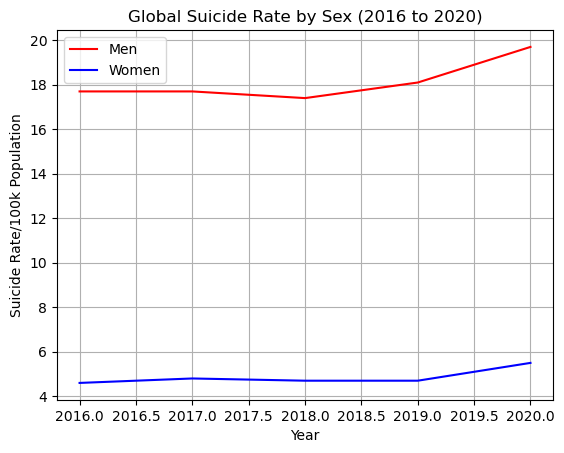

In [51]:
time = np.arange(2016, 2021, 1)
men_data = [17.7, 17.7, 17.4, 18.1, 19.7]
women_data = [4.6, 4.8, 4.7, 4.7, 5.5]

Men, = plt.plot(time, men_data, color="red", label="Men")
Women, = plt.plot(time, women_data, color="blue", label="Women")


plt.title("Global Suicide Rate by Sex (2016 to 2020)")
plt.xlabel("Year")
plt.ylabel("Suicide Rate/100k Population")
plt.legend(handles=[Men, Women], loc="best")
plt.grid()

In [36]:

countries = []
country_income=[]
country_name =[]
income_level = []


# Show Record Count

query_url = "http://api.worldbank.org/v2/countries?format=json"

country_data = requests.get(query_url).json()
countries = country_data[1]

for  country in countries:
        
    try:
        # Parse the JSON and retrieve data
        country_name.append(country['name'])
       
        income_level.append(country['incomeLevel']['value'])
        
       
    # If an error is experienced, skip the country
    except:
        print("country not found. Skipping...")
        pass
    
#creating a data frame with country and its income level              
country_income_df = pd.DataFrame({"Country": country_name, 
                                  "Income": income_level})
print(country_income_df)
print(f"Number of countries in the list: {len(countries)}")
#if (response_1.status_code != 204 and response.headers["content-type"].strip().startswith("application/json")):
    #try:
        #return response_1.json()
    #except ValueError:

#pprint(country_data)

                                              Country               Income
0                                               Aruba          High income
1                         Africa Eastern and Southern           Aggregates
2                                         Afghanistan           Low income
3                                              Africa           Aggregates
4                          Africa Western and Central           Aggregates
5                                              Angola  Lower middle income
6                                             Albania  Upper middle income
7                                             Andorra          High income
8                                          Arab World           Aggregates
9                                United Arab Emirates          High income
10                                          Argentina  Upper middle income
11                                            Armenia  Upper middle income
12                       

In [37]:
USA_data.head(30)



,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,15.8,827,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,30.8,220,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,19.5,1475,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,20.6,618,/nchs/pressroom/states/arkansas/ar.htm
4,2021,CA,10.1,4148,/nchs/pressroom/states/california/ca.htm
5,2021,CO,22.8,1384,/nchs/pressroom/states/colorado/co.htm
6,2021,CT,10.0,401,/nchs/pressroom/states/connecticut/ct.htm
7,2021,DE,13.6,137,/nchs/pressroom/states/delaware/de.htm
8,2021,FL,14.0,3351,/nchs/pressroom/states/florida/fl.htm
9,2021,GA,15.3,1676,/nchs/pressroom/states/georgia/ga.htm


YEAR
2005    12.444
2014    15.030
2015    15.634
2016    15.792
2017    16.702
2018    16.450
2019    16.398
2020    16.078
2021    16.972
Name: RATE, dtype: float64


,YEAR,STATE,RATE,DEATHS
0,2021,AL,15.8,827
1,2021,AK,30.8,220
2,2021,AZ,19.5,1475
3,2021,AR,20.6,618
4,2021,CA,10.1,4148


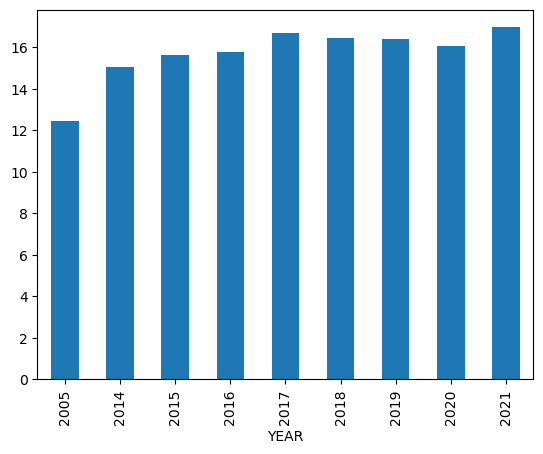

In [39]:
#creatind dataframe from the csv file

USA_by_year_df = pd.DataFrame(USA_data, columns=["YEAR","STATE","RATE","DEATHS"])
state = USA_by_year_df.groupby(["YEAR"])["RATE"].mean()
print(state)
state.plot.bar(y= "RATE")

#getting the date precovid from 2016 to 219
#USA_precovid= USA_by_year_df.loc[(USA_by_year_df["YEAR"]>=2016) & (USA_by_year_df["YEAR"]<=2019)]

#state = USA_precovid.groupby(["YEAR"])["RATE"].mean()
#print(state)
#state.plot.bar(y= "RATE")
USA_by_year_df.head()